In [1]:
from IPython.core.interactiveshell import InteractiveShell as IS
IS.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
veriler = pd.read_csv('./data/veriler.csv')

In [4]:
df = veriler.copy()
df.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [5]:
df = df.iloc[:,1:]

In [6]:
x = df.drop(columns=['cinsiyet'])
y = df[['cinsiyet']]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.33)
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test  = sc.transform(x_test)

In [8]:
X_train
X_train

array([[ 0.45049444, -0.29657884, -0.26680787],
       [ 1.00824945,  0.5096549 ,  0.        ],
       [ 1.13696215,  0.91277178, -0.17787191],
       [-1.6089087 , -1.18343596, -1.15616745],
       [-1.35148331, -1.34468271, -1.33403936],
       [ 0.57920713,  0.91277178,  0.44467979],
       [ 0.87953676,  0.5096549 ,  0.17787191],
       [ 0.79372829,  1.51744708,  0.71148766],
       [ 0.36468597,  0.91277178,  0.88935957],
       [ 0.70791983,  0.8321484 ,  0.26680787],
       [-1.43729177, -1.50592946, -1.42297532],
       [-1.56600447, -1.50592946, -1.33403936],
       [ 0.32178174,  0.10653803,  1.95659106],
       [-0.27887751, -0.37720222,  1.2451034 ]])

array([[ 0.45049444, -0.29657884, -0.26680787],
       [ 1.00824945,  0.5096549 ,  0.        ],
       [ 1.13696215,  0.91277178, -0.17787191],
       [-1.6089087 , -1.18343596, -1.15616745],
       [-1.35148331, -1.34468271, -1.33403936],
       [ 0.57920713,  0.91277178,  0.44467979],
       [ 0.87953676,  0.5096549 ,  0.17787191],
       [ 0.79372829,  1.51744708,  0.71148766],
       [ 0.36468597,  0.91277178,  0.88935957],
       [ 0.70791983,  0.8321484 ,  0.26680787],
       [-1.43729177, -1.50592946, -1.42297532],
       [-1.56600447, -1.50592946, -1.33403936],
       [ 0.32178174,  0.10653803,  1.95659106],
       [-0.27887751, -0.37720222,  1.2451034 ]])

In [9]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)
y_pred  = log_reg.predict(X_test)
x_test
y_pred
y_test

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

,boy,kilo,yas
20,164,66,32
10,165,55,27
14,167,62,55
13,162,59,41
1,125,36,11
21,166,56,42
11,155,50,44
19,159,40,29


array(['e', 'e', 'e', 'e', 'k', 'e', 'e', 'e'], dtype=object)

,cinsiyet
20,k
10,k
14,k
13,k
1,e
21,k
11,k
19,k


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 1],
       [7, 0]])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 1],
       [5, 2]])

In [13]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0],
       [2, 5]])

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 1],
       [5, 2]])

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 1],
       [6, 1]])

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

DecisionTreeClassifier(criterion='entropy')

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0],
       [1, 6]])

In [21]:
from sklearn.ensemble import RandomForestClassifier 
dtc = RandomForestClassifier(n_estimators=20, criterion="gini")
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test) 

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=20)

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0],
       [0, 7]])

<table >
  <tr align="center">
    <th></th>
    <th>C1</th>
    <th>C2</th>
  </tr>
  <tr>
    <th align="center">C1</th>
    <td>True Positive</td>
    <td>False Negative</td>
  </tr>
  <tr>
    <th align="center">C2</th>
    <td>False Positive</td>
    <td>True Negative</td>
  </tr>
</table>


## True POsitive
sensitivity = t-pos / (t-pos + f-neg) *True positive recognition rate*

specificity = t-neg / (t-neg + f-pos)     *True negative recognition rate*

precision   = t-pos / (t-pos + f-pos)

accuracy    = sensitivity * pos / (pos + neg) + specificity * neg / (pos + neg)

# Değerlendirme

## Sensitivity - True Positive Rate => TP / (TP + FN)

## Specificity - True Negative Rate => TN / (TN + FP)

### Precision - Positive Predicted Value => TP / (TP + FP)

### Negative Predicted Value TN          => TN / (TN + FN)

### Fall-out - False Positive Rate       => FP / (TN + FP)

### False Discovery Rate                 => FP / (TP + FP)

### Miss Rate - False Negative Rate      => FN / (TP + FN)

### Accuracy                             => (TP + TN) / Total

### F1 Score                             =>  2TP / ( 2TP + FP + FN )

In [23]:
import seaborn as sns
iris = sns.load_dataset(name='iris')

In [81]:
df = iris.copy()
df.head()
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [83]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [156]:

def get_all_label_encoding():
    return df.select_dtypes(exclude=['number']) \
                .apply(LabelEncoder().fit_transform) \
                .join(df.select_dtypes(include=['number']))


x = df.drop(columns=['species'])
y = df[['species']]
# y = df[['species']].apply(LabelEncoder().fit_transform)

In [157]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(dtype=int, sparse_output=False)
# reshaped = x.values.reshape(len(x), 1)
# species = ohe.fit_transform(reshaped)
# df.drop(columns=['species'], inplace=True)
# df.join(species)

In [159]:
x
y

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [168]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()
X_train = sts.fit_transform(x_train)
X_test  = sts.transform(x_test)

In [193]:
def cm(y_test, y_pred, model_name):
    cmx = confusion_matrix(y_test, y_pred)
    print(f"{model_name}", cmx, "", sep='\n')

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.svm          import SVC

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

knn     = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(X_train, y_train)

gnb     = GaussianNB()
gnb.fit(X_train, y_train)

dtc     = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

rfc     = RandomForestClassifier(n_estimators=10, criterion='entropy')
rfc.fit(X_train, y_train)


svc     = SVC(kernel='rbf')
svc.fit(X_train, y_train)
"--------------------------"

y_pred  = log_reg.predict(X_test)
cm(y_test, y_pred, "LogisticRegression")


y_pred  = knn.predict(X_test)
cm(y_test, y_pred, "KNeighborsClassifier")


y_pred  = gnb.predict(X_test)
cm(y_test, y_pred, "GaussianNaiveBayes")


y_pred  = dtc.predict(X_test)
cm(y_test, y_pred, "DecisionTreeClassifier")


y_pred  = rfc.predict(X_test)
cm(y_test, y_pred, "RandomForestClassifier")


y_pred  = svc.predict(X_test)
cm(y_test, y_pred, "SVC")

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

DecisionTreeClassifier(criterion='entropy')

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=10)

/home/kerim/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

'--------------------------'

LogisticRegression
[[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]

KNeighborsClassifier
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]

GaussianNaiveBayes
[[16  0  0]
 [ 0 19  0]
 [ 0  2 13]]

DecisionTreeClassifier
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]

RandomForestClassifier
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]

SVC
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]



In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Sınıflandırma algoritmalarını bir listede toplayın
classifiers = [log_reg, knn, gnb, dtc, rfc, svc]
classifier_names = ["Logistic Regression", "K-Nearest Neighbors", "Gaussian Naive Bayes", "Decision Tree", "Random Forest", "Support Vector Classifier"]
for i, classifier in enumerate(classifiers):
    y_pred = classifier.predict(X_test)
    print(f"-------- {classifier_names[i]} --------")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

ValueError: X has 2 features, but LogisticRegression is expecting 3 features as input.

Text(0.5, 1.0, 'Input data')

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Nearest Neighbors')

Text(2.3813716830490255, -1.2357020680498332, '.97')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.025, kernel='linear', random_state=42))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Linear SVM')

Text(2.3813716830490255, -1.2357020680498332, '.88')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=2, random_state=42))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'RBF SVM')

Text(2.3813716830490255, -1.2357020680498332, '.97')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussianprocessclassifier',
                 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1),
                                           random_state=42))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Gaussian Process')

Text(2.3813716830490255, -1.2357020680498332, '.97')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Decision Tree')

Text(2.3813716830490255, -1.2357020680498332, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=1,
                                        n_estimators=10, random_state=42))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Random Forest')

Text(2.3813716830490255, -1.2357020680498332, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=1000, random_state=42))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Neural Net')

Text(2.3813716830490255, -1.2357020680498332, '.90')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'AdaBoost')

Text(2.3813716830490255, -1.2357020680498332, '.93')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'Naive Bayes')

Text(2.3813716830490255, -1.2357020680498332, '.88')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('quadraticdiscriminantanalysis',
                 QuadraticDiscriminantAnalysis())])

(-1.818500344394381, 2.6813716830490253)

(-1.5357020680498332, 2.071899312714103)

[]

[]

Text(0.5, 1.0, 'QDA')

Text(2.3813716830490255, -1.2357020680498332, '.85')

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.93')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.025, kernel='linear', random_state=42))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.40')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=2, random_state=42))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.88')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussianprocessclassifier',
                 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1),
                                           random_state=42))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.90')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.78')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=1,
                                        n_estimators=10, random_state=42))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.75')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=1000, random_state=42))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.88')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.82')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.70')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('quadraticdiscriminantanalysis',
                 QuadraticDiscriminantAnalysis())])

(-1.6318489313792643, 1.6298079636035776)

(-1.7894269424127711, 1.5730603182233371)

[]

[]

Text(1.3298079636035776, -1.489426942412771, '.72')

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.025, kernel='linear', random_state=42))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.93')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=2, random_state=42))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussianprocessclassifier',
                 GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1),
                                           random_state=42))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.93')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=1,
                                        n_estimators=10, random_state=42))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1, max_iter=1000, random_state=42))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('quadraticdiscriminantanalysis',
                 QuadraticDiscriminantAnalysis())])

(-2.301737447070235, 3.6087431161656847)

(0.06802498168359294, 4.392677587182645)

[]

[]

Text(3.308743116165685, 0.36802498168359293, '.93')

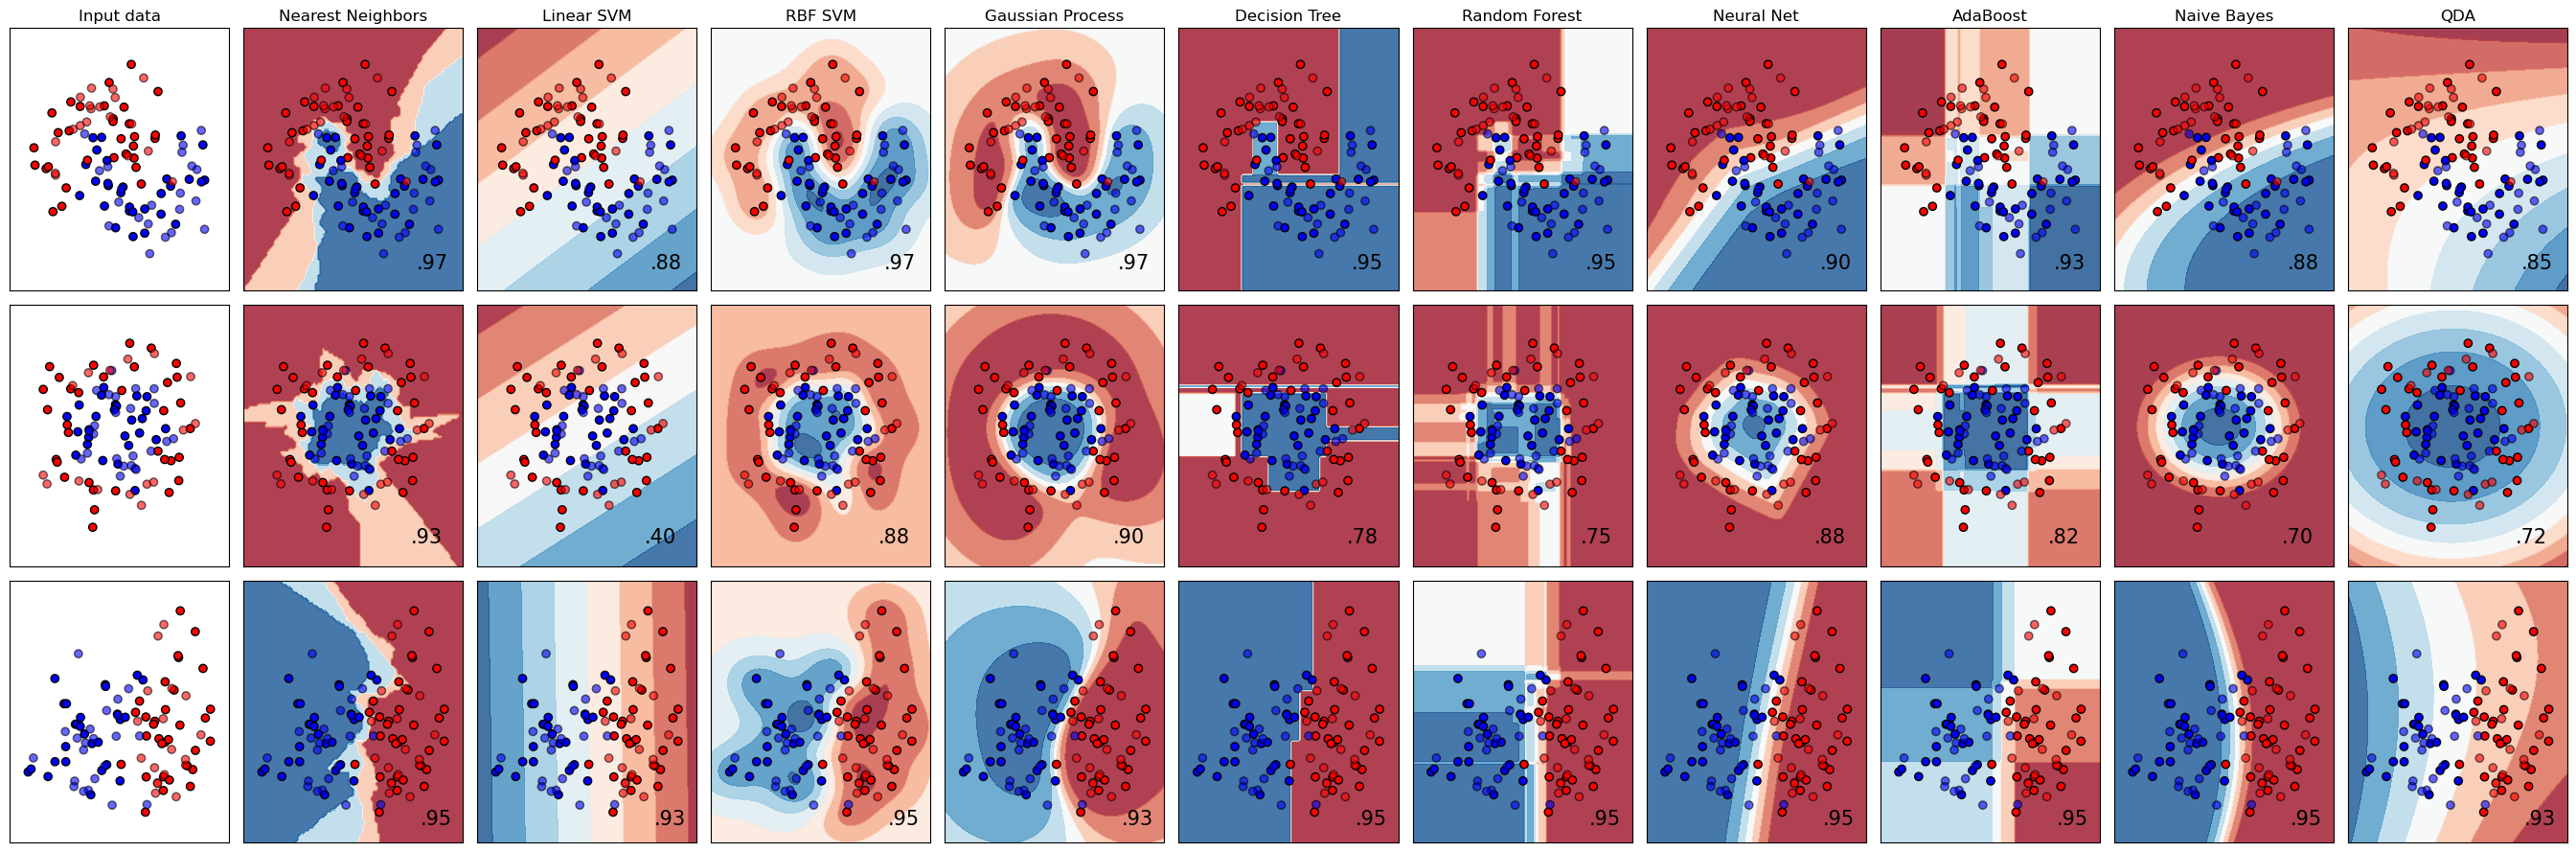

In [205]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()